#### 2023/11/01
#### 「Pythonによる異常検知」の勉強 &
#### 次元圧縮手法の模索
#### 参考：https://github.com/sogabe-tohma/Python-code-for-anomaly-detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocess_data import PreprocessData

# 井原さん 紙箱 1回目 加工なし
box_a1 = PreprocessData('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        180)

#### ▶ t-SNE

In [2]:
from sklearn.manifold import TSNE
PT_NUM = 943

# 2値化画像
df_org = box_a1.df_drop_point
img_vector = df_org['140*140_img_vector'].to_list()
img_vector = np.array(img_vector)

# x軸
df_org = box_a1.df_slide_expand
x = np.array(df_org['ptx_mm_slide_expand'].to_list())

# y軸
df_org = box_a1.df_drop_point
y = np.array(df_org['pty_mm_slide_expand'].to_list())


tsne = TSNE(n_components=2, random_state = 0, perplexity = 10, n_iter = 1000)
# tsne_result = tsne.fit_transform(img_vector)
tsne_result = tsne.fit_transform(img_vector)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


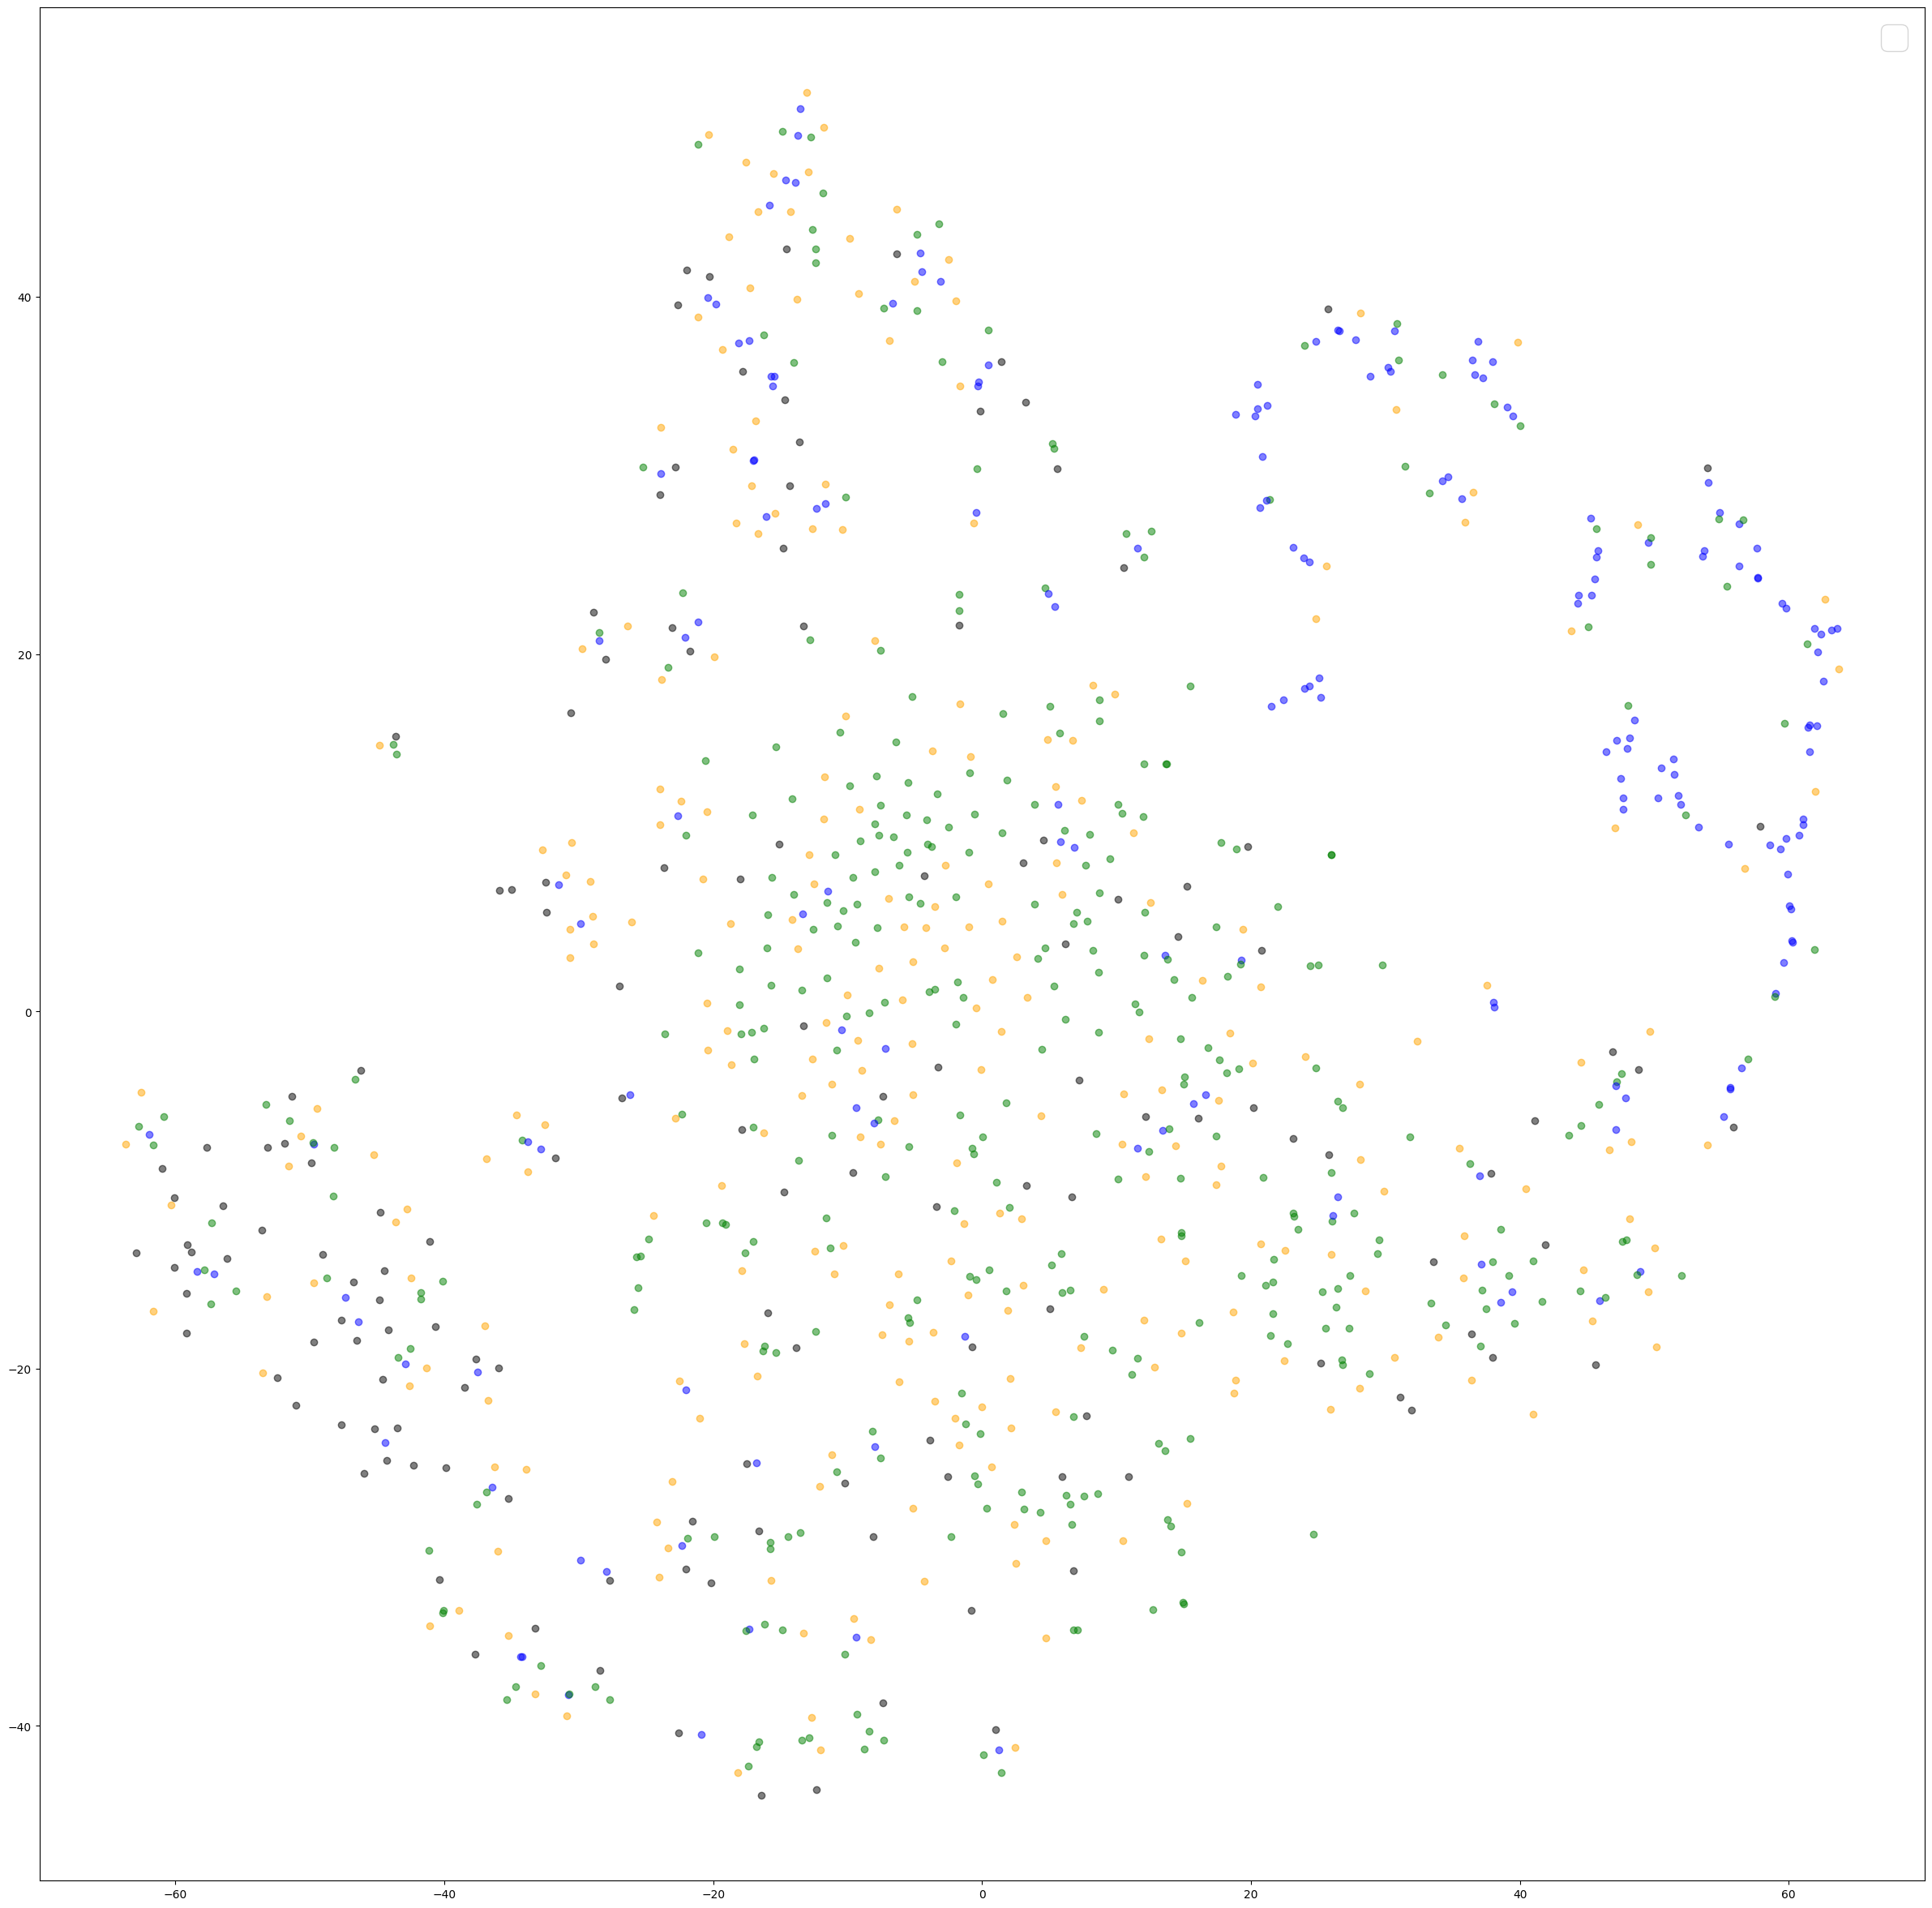

In [3]:
df_org['tsne_ax0'] = tsne_result[:, 0:1]
df_org['tsne_ax1'] = tsne_result[:, 1:2]

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_org['shape_int'], df_org['tsne_ax0'], df_org['tsne_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='o')

plt.legend(fontsize = 30)

In [1]:
import umap
mapper = umap.UMAP(n_components=2, 
                   n_neighbors=10,
                   random_state=0)

# umap_result = mapper.fit_transform(img_vector)
umap_result = mapper.fit_transform(x)

NameError: name 'x' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


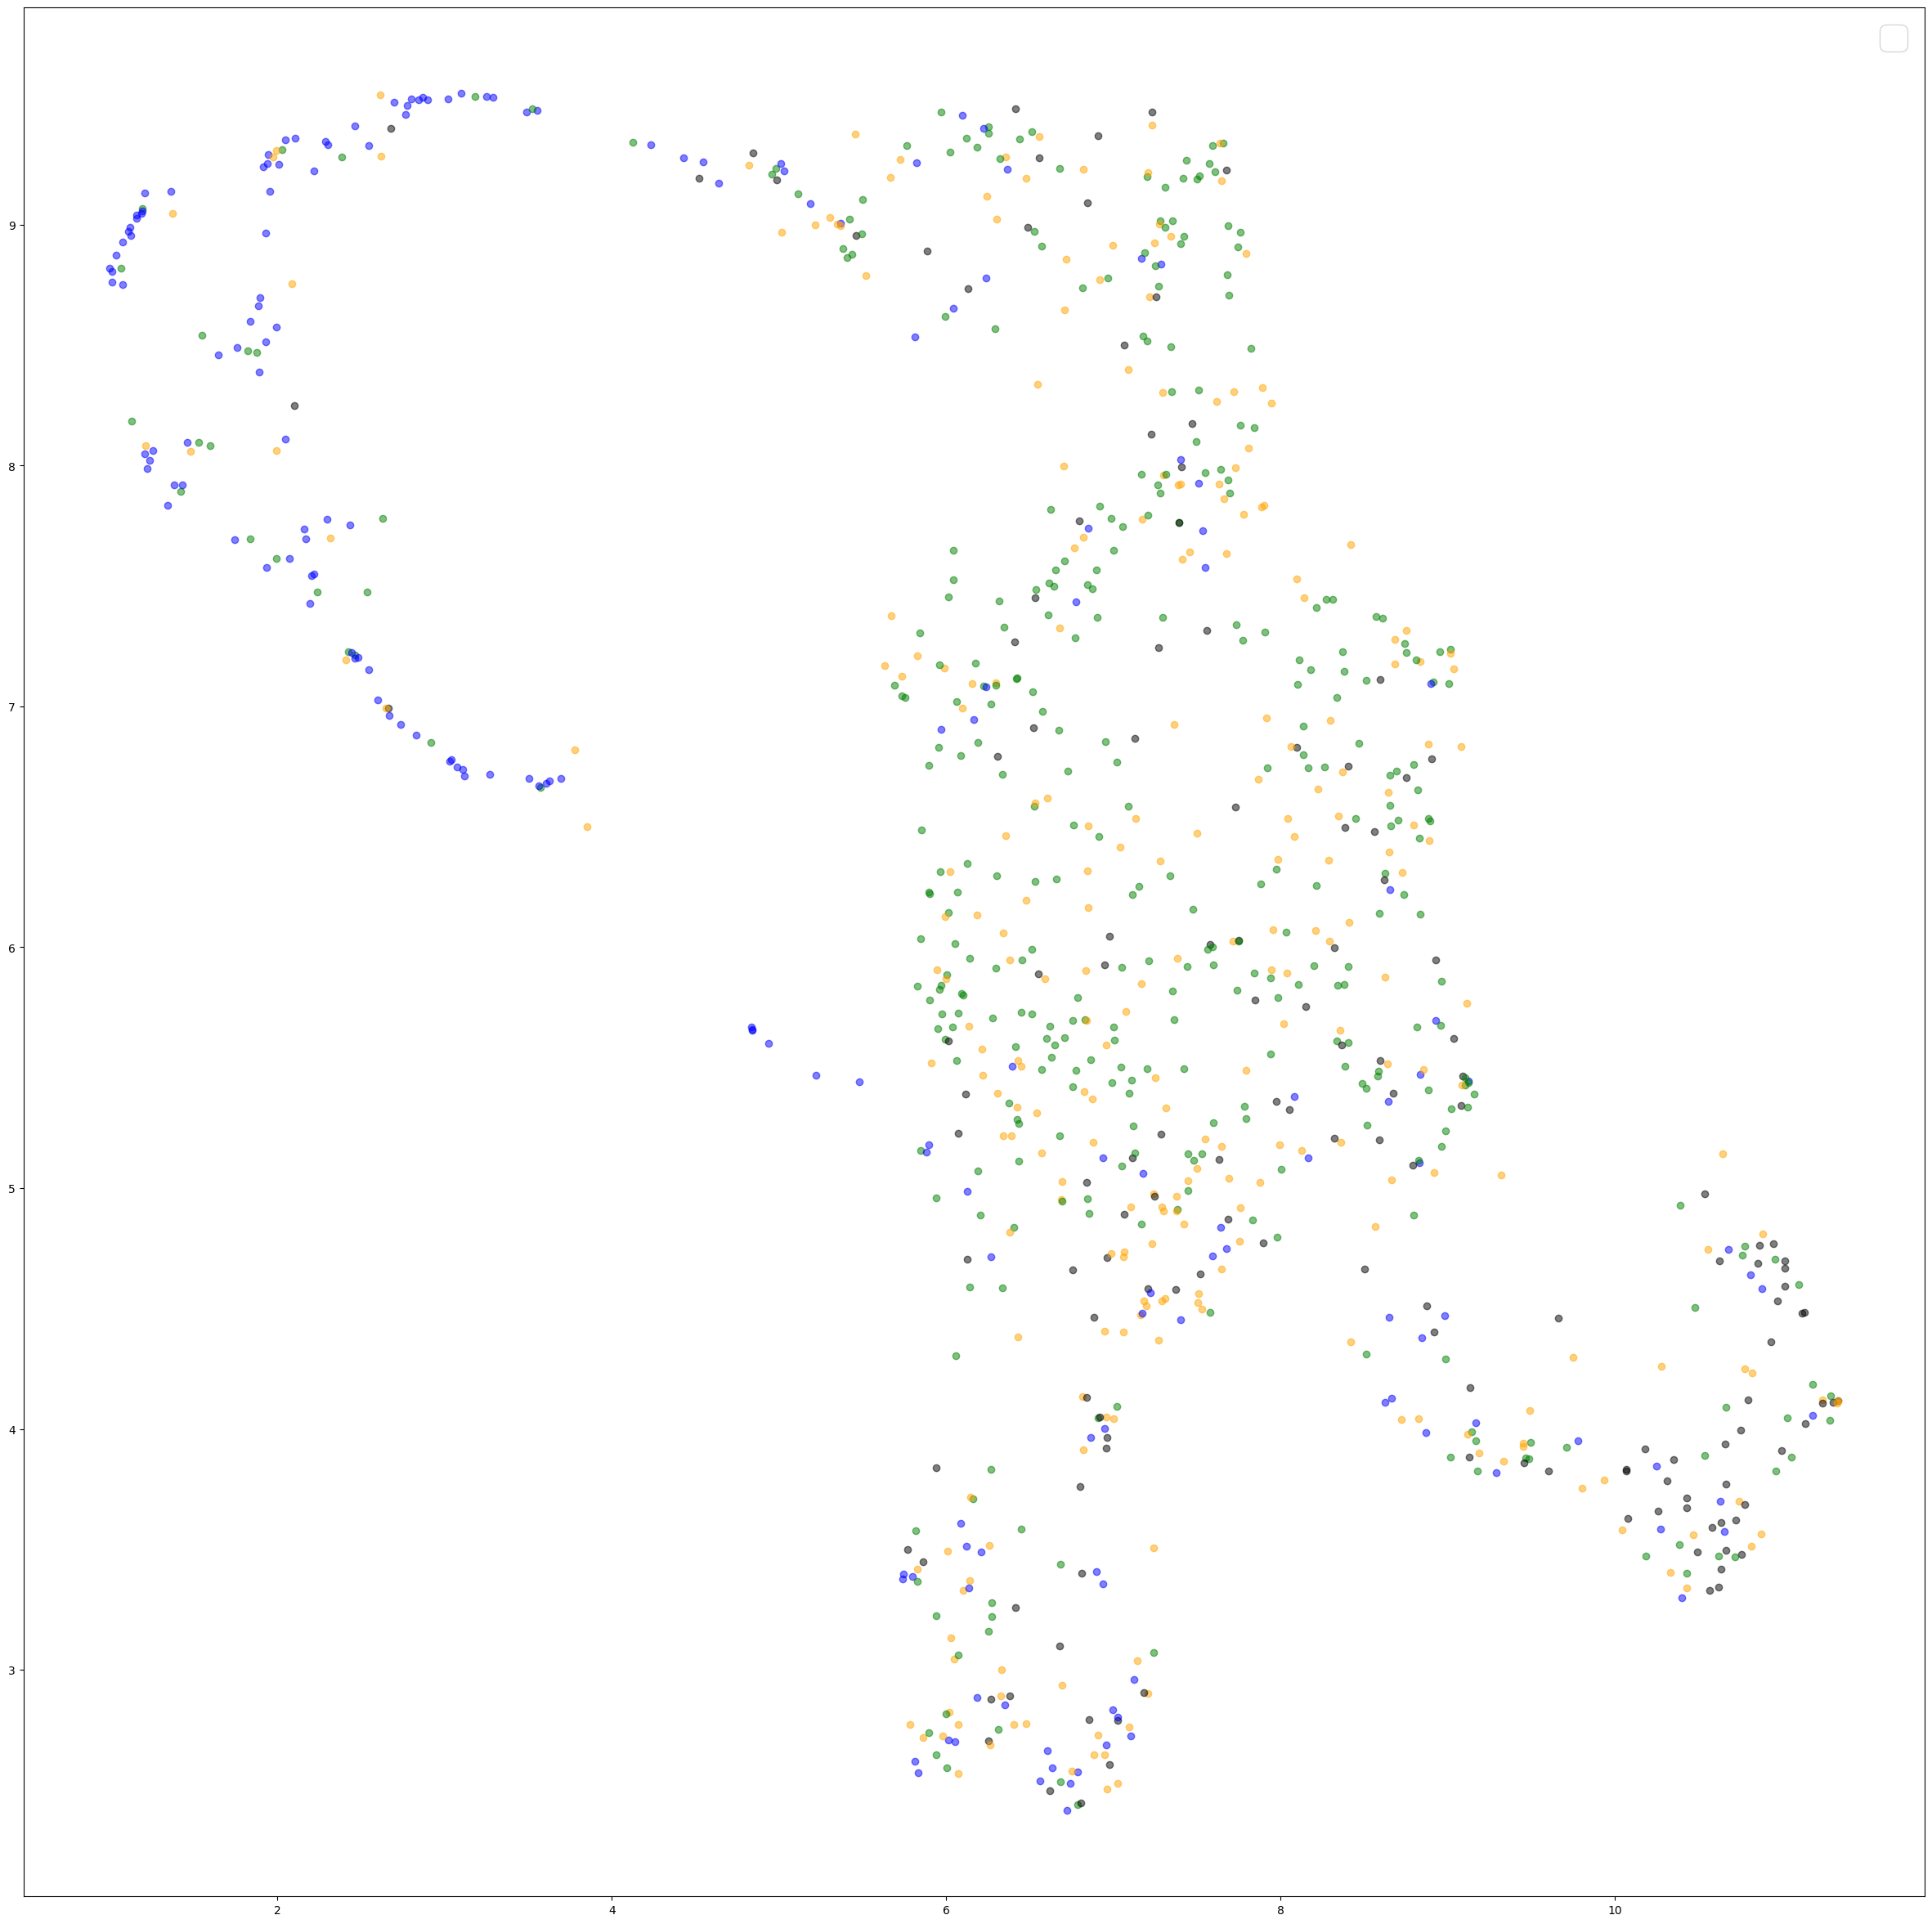

In [5]:
df_org['umap_ax0'] = umap_result[:, 0:1]
df_org['umap_ax1'] = umap_result[:, 1:2]

colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for shape_int, col0, col1 in zip(df_org['shape_int'], df_org['umap_ax0'], df_org['umap_ax1']):
    plt.scatter(col0, col1, color=colors[shape_int], alpha=0.5, marker='o')

plt.legend(fontsize = 30)

In [17]:
from sklearn.cluster import KMeans

df_kmeans_input = pd.DataFrame([df_org['umap_ax0'], df_org['umap_ax1']]).transpose()
kmeans = KMeans(n_clusters=5, random_state=10).fit(df_kmeans_input)
labels = kmeans.labels_
df_kmeans_input['kmeans_label'] = labels

c:\Users\ispec\MyWorkSpace\python\drawing_2023_windows\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


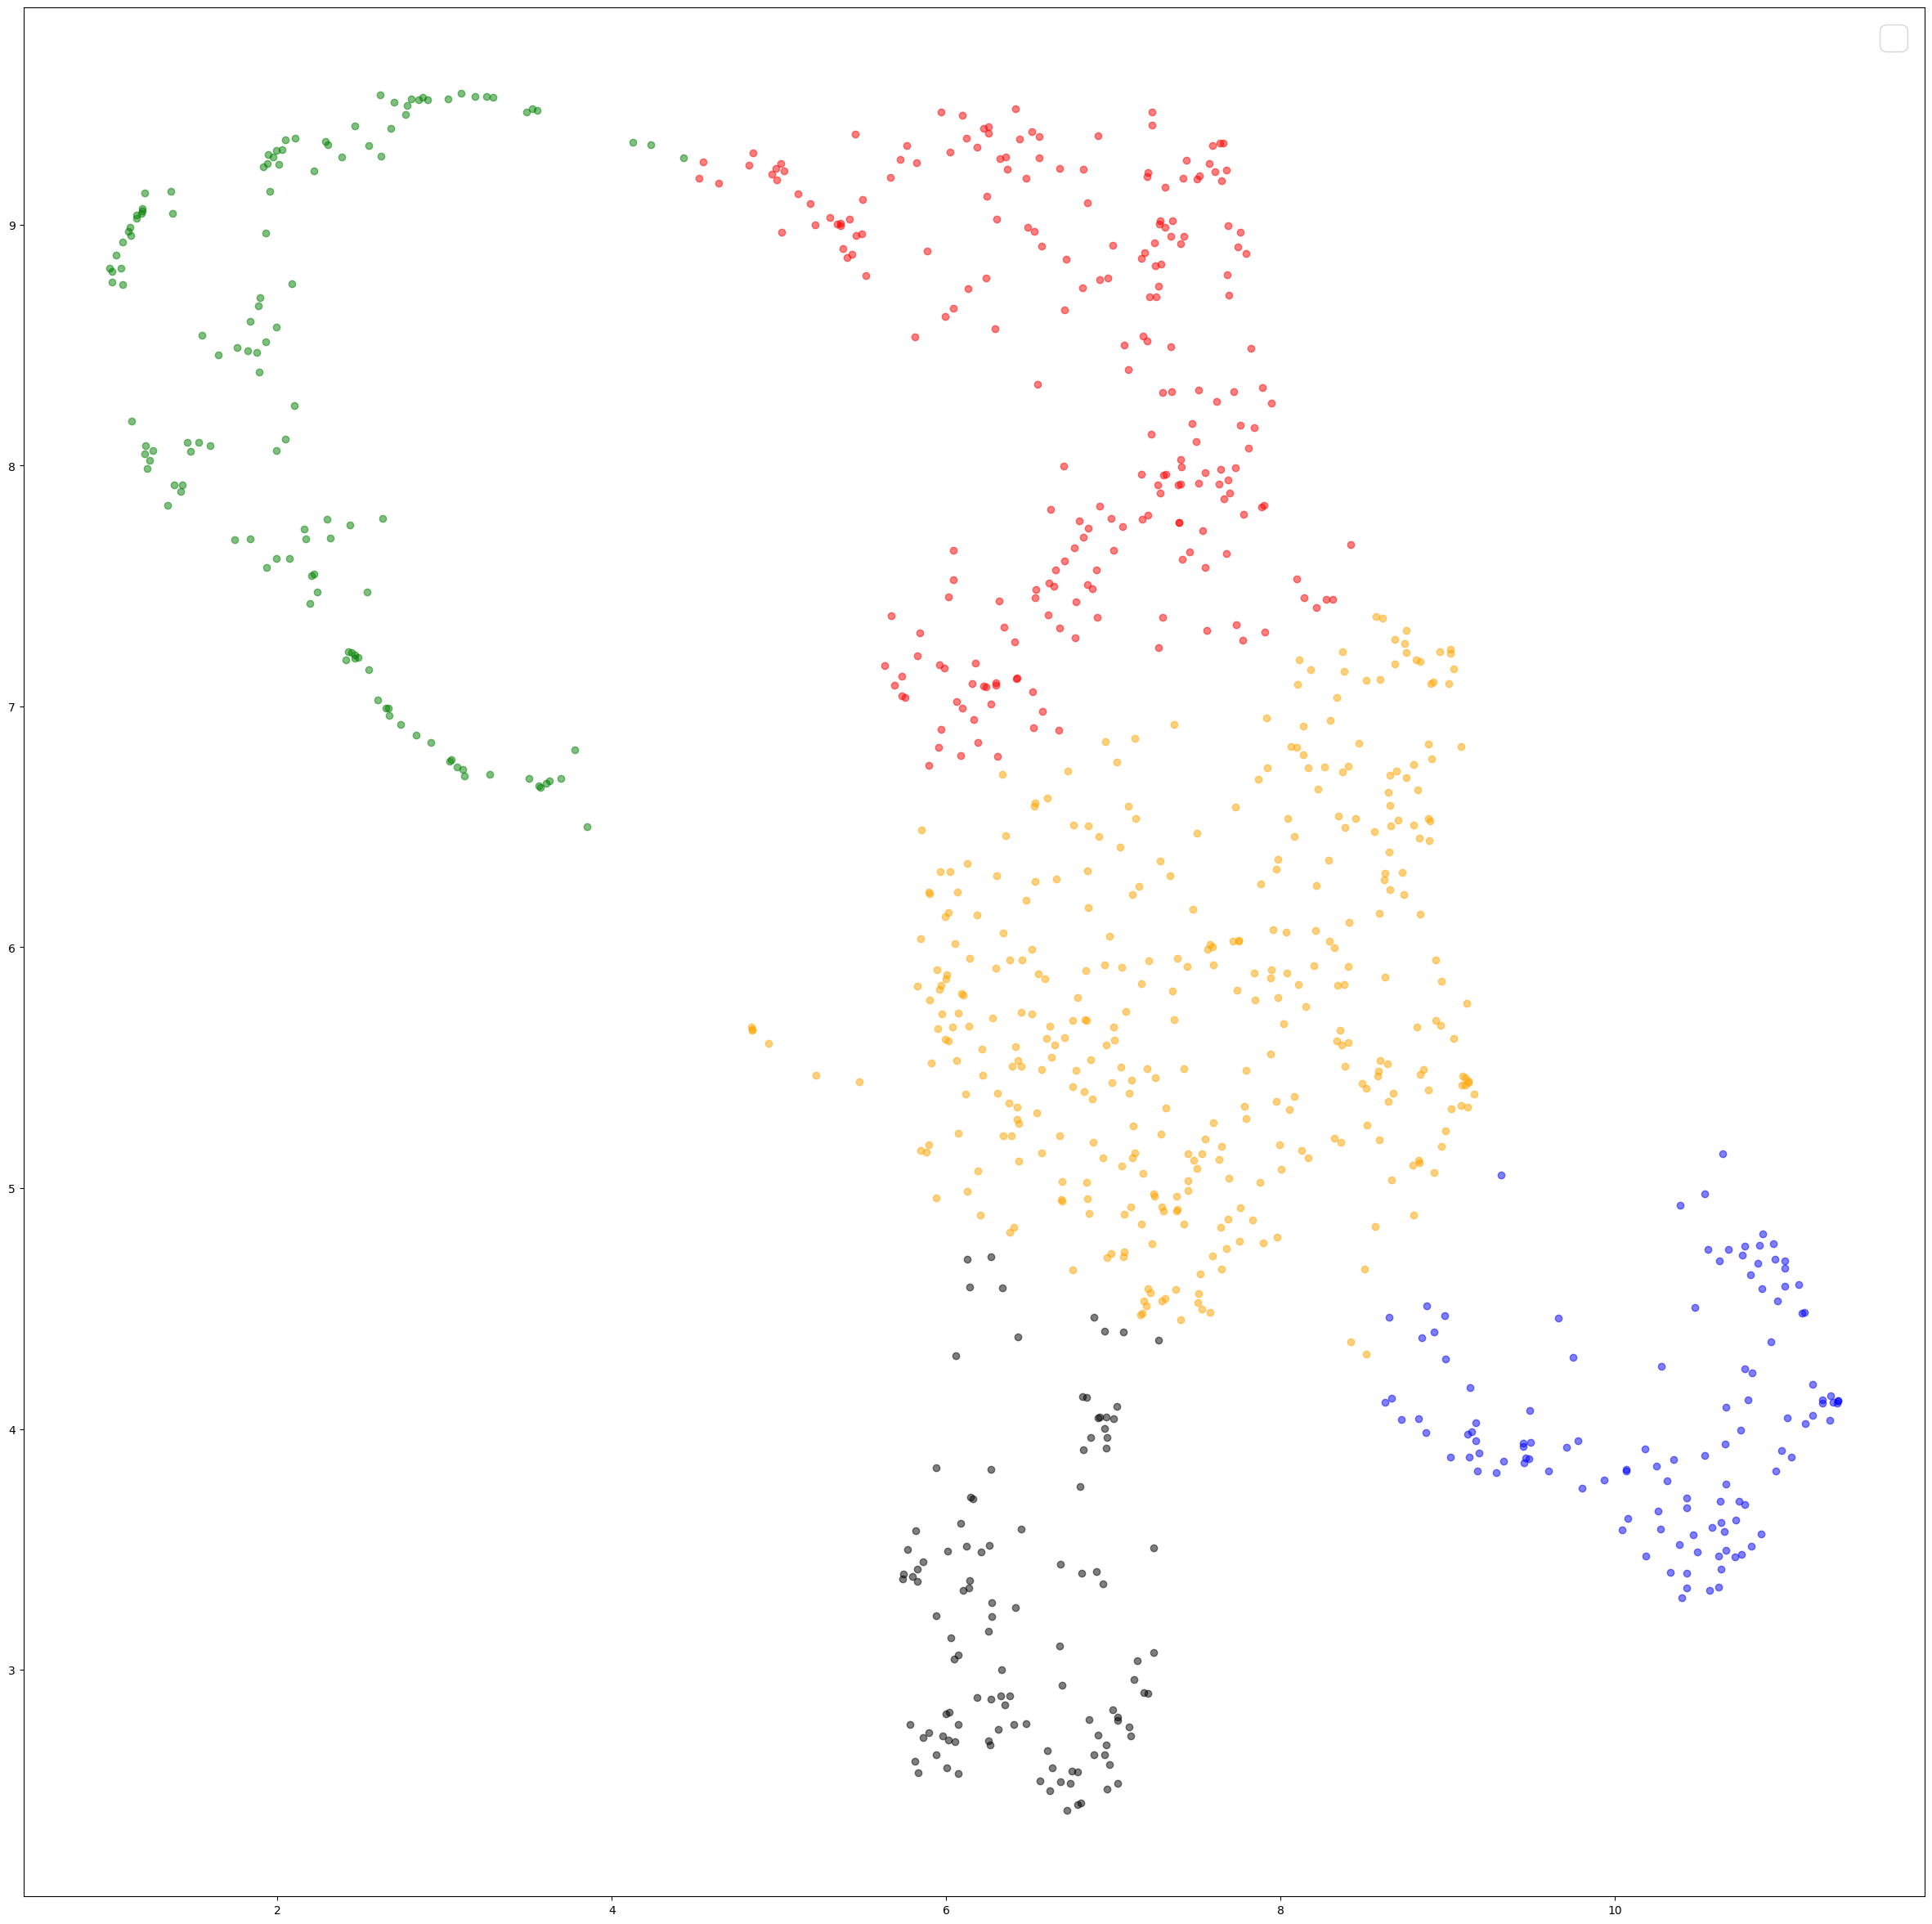

In [18]:
kmeans_colors =  ["red", "blue", "green", "orange", "black"]
plt.figure(figsize = (30, 30))

for kmeans_label, col0, col1 in zip(df_kmeans_input['kmeans_label'], df_kmeans_input['umap_ax0'], df_kmeans_input['umap_ax1']):
    plt.scatter(col0, col1, color=kmeans_colors[kmeans_label], alpha=0.5, marker='o')

plt.legend(fontsize = 30)

In [1]:
from preprocess_data_plusinfo import PreprocessDataPlusInfo

box_a1 = PreprocessDataPlusInfo('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        180)

In [2]:
box_a1.df_addinfo

,stroke_id,time,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,ptx_mm_slide_expand,pty_mm_slide_expand,is_point,140*140_img,140*140_img_vector,drawing_id,year,month,day,motif,times,name
0,0,0,Straight,115.473684,1,80.054154,"[103.16250000000002, 104.32499999999999, 105.2...","[194.40000000000003, 194.70000000000002, 195.1...","[0.0, 0.5175292153589292, 1.0350584307178583, ...","[0.0, 0.13355592654424547, 0.26711185308849095...",0,"[[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
1,1,2,Straight,106.814815,1,237.091119,"[169.08750000000003, 168.82500000000005, 168.7...","[237.9, 238.2375, 238.425, 238.425, 237.4875, ...","[0.9210526315789478, 0.59868421052633, 0.27631...","[397.71052631578965, 398.1250000000003, 398.53...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
2,2,9,Simple curve,109.294118,2,41.309921,"[169.20000000000005, 169.20000000000005, 169.1...","[236.5875, 236.6625, 238.5, 239.9625, 241.125,...","[4.203821656051186, 4.203821656051186, 4.20382...","[0.0, 0.38216560509548336, 0.7643312101909667,...",0,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
3,3,11,Simple curve,118.181818,2,38.290272,"[103.42500000000001, 103.53750000000002, 103.5...","[194.32500000000002, 196.27500000000003, 197.4...","[14.055118110235815, 14.081504439604295, 14.10...","[0.0, 0.4573630423857233, 0.9147260847714466, ...",0,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
4,4,14,Simple curve,95.833333,2,5.867893,"[102.41250000000004, 102.41250000000004, 102.4...","[231.8625, 231.90000000000003, 232.20000000000...","[38.940397350995745, 38.940397350995745, 38.94...","[0.0, 0.46357615893997384, 0.9271523178820558,...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,1038,1199,Complex,122.279070,3,112.590388,"[113.8875, 119.25000000000001, 120.90000000000...","[239.32500000000002, 243.63750000000002, 245.1...","[24.568245125347115, 27.555710306405583, 30.54...","[74.8746518105851, 77.27715877437302, 79.67966...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
1039,1039,1200,Complex,116.307692,3,107.168764,"[116.47500000000004, 115.68750000000001, 115.3...","[216.675, 218.925, 221.51250000000002, 230.850...","[68.1398601398605, 67.552447552448, 66.9650349...","[42.881118881119065, 44.5594405594408, 46.2377...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
1040,1040,1204,Point,92.000000,0,0.000000,[120.90000000000005],[223.2375],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
1041,1041,1204,Complex,121.680982,3,550.403779,"[121.2, 121.16250000000004, 120.90000000000005...","[221.175, 220.425, 220.16250000000002, 220.387...","[102.36336779911377, 102.05317577548038, 101.7...","[65.1403249630724, 58.93648449039884, 52.73264...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,2013,4,18,紙箱,1,井原亜利紗
